<a href="https://colab.research.google.com/github/00alba00/TFM/blob/main/Human_difficulty_(Fleiss_Kappa)_and_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PROCESSING**

Calculating Fleiss Kappa for every category

In [ ]:
import pandas as pd

def organize_data(data_file):
    # Read the data from the file into a DataFrame
    df = pd.read_csv(data_file)

    # Initialize an empty DataFrame to store the organized data
    organized_df = pd.DataFrame(columns=["ID", 'COLA-ES', 'Annotator_1', 'Annotator_2', 'Annotator_3'])

    # Iterate over each category from 1 to 14
    for category in range(1, 15):
        # Filter the DataFrame to include only rows with the current category
        category_df = df[df['COLA-ES'] == category]

        # Concatenate the filtered DataFrame to the organized DataFrame
        organized_df = pd.concat([organized_df, category_df[["ID",'COLA-ES', 'Annotator_1', 'Annotator_2', 'Annotator_3']]])

    # Reset the index of the organized DataFrame
    organized_df.reset_index(drop=True, inplace=True)

    return organized_df


organized_data_df = organize_data("test_pred.csv")
print(organized_data_df.head())

            ID COLA-ES Annotator_1 Annotator_2 Annotator_3
0  ESCoLA_3533       1           0           1           1
1  ESCoLA_1993       1           0           0           0
2  ESCoLA_3940       1           0           0           0
3   ESCoLA_582       1           0           0           0
4  ESCoLA_3802       1           0           0           0


In [ ]:
import pandas as pd

# Group the DataFrame by the "Category" column
grouped_data = organized_data_df.groupby("COLA-ES")

# Iterate over each group and save it to a CSV file
for category, data in grouped_data:
    # Create a filename based on the category
    filename = f"{category}_data.csv"
    # Save the data to a CSV file
    data.to_csv(filename, index=False)

In [ ]:
import numpy as np

def fleiss_kappa(data):
    """
    Calculate Fleiss' Kappa for categorical ratings using NumPy.

    Parameters:
    - data: 2D array or DataFrame where rows are items and columns are raters.

    Returns:
    - Fleiss' Kappa coefficient.
    """

    # Count the number of items and raters
    num_items, num_raters = data.shape

    # Count the number of unique categories
    num_categories = np.max(data) + 1

    # Compute the rating frequencies for each item
    rating_freq = np.zeros((num_items, num_categories))
    for i in range(num_items):
        for j in range(num_raters):
            rating_freq[i, data[i, j]] += 1

    # Compute the agreement matrix
    agreement_matrix = np.sum(rating_freq * (rating_freq - 1), axis=1)
    agreement_matrix /= num_raters * (num_raters - 1)

    # Compute observed agreement
    observed_agreement = np.mean(agreement_matrix)

    # Compute chance agreement
    p_i = np.sum(rating_freq, axis=0) / (num_items * num_raters)
    chance_agreement = np.sum(p_i ** 2)

    # Compute Fleiss' Kappa
    kappa = (observed_agreement - chance_agreement) / (1 - chance_agreement)

    return kappa

In [ ]:
import pandas as pd

data = pd.read_csv("14_data.csv")

# Extracting relevant columns
ratings = data[["Annotator_1", "Annotator_2", "Annotator_3"]].to_numpy()

# Calculating Fleiss' Kappa
kappa = fleiss_kappa(ratings)
print("Fleiss' Kappa:", kappa)

Fleiss' Kappa: 0.668179987551715


In [ ]:
import pandas as pd

data = {
    "COLA-ES": list(range(1, 15)),
    "Fleiss Kappa": [
        0.6273291925465836,
        0.7691197691197689,
        0.5874775985663083,
        0.6838814265863827,
        0.4731182795698928,
        0.5630236100533134,
        0.5584249360036139,
        0.5707472178060412,
        0.720803864067621,
        0.7308080808080807,
        0.5648148148148152,
        0.6558811558811561,
        0.6563533301842228,
        0.668179987551715
    ]
}

df = pd.DataFrame(data)
print(df)

    COLA-ES  Fleiss Kappa
0         1      0.627329
1         2      0.769120
2         3      0.587478
3         4      0.683881
4         5      0.473118
5         6      0.563024
6         7      0.558425
7         8      0.570747
8         9      0.720804
9        10      0.730808
10       11      0.564815
11       12      0.655881
12       13      0.656353
13       14      0.668180


Calculating the Accuracy for every category

In [ ]:
import pandas as pd

def organize_data(data_file):
    # Read the data from the file into a DataFrame
    df = pd.read_csv(data_file)

    # Initialize an empty DataFrame to store the organized data
    organized_df = pd.DataFrame(columns=["ID", 'COLA-ES', "roberta-large-bne", "Label"])

    # Iterate over each category from 1 to 14
    for category in range(1, 15):
        # Filter the DataFrame to include only rows with the current category
        category_df = df[df['COLA-ES'] == category]

        # Concatenate the filtered DataFrame to the organized DataFrame
        organized_df = pd.concat([organized_df, category_df[["ID", 'COLA-ES', "roberta-large-bne", "Label"]]])

    # Reset the index of the organized DataFrame
    organized_df.reset_index(drop=True, inplace=True)

    return organized_df


organized_data_df_2 = organize_data("test_pred.csv")
print(organized_data_df_2.head())

            ID COLA-ES roberta-large-bne Label
0  ESCoLA_3533       1                 0     1
1  ESCoLA_1993       1                 0     0
2  ESCoLA_3940       1                 0     0
3   ESCoLA_582       1                 0     0
4  ESCoLA_3802       1                 0     0


In [ ]:
import pandas as pd

# Group the DataFrame by the "Category" column
grouped_data = organized_data_df_2.groupby("COLA-ES")

# Iterate over each group and save it to a CSV file
for category, data in grouped_data:
    # Create a filename based on the category
    filename = f"{category}_data.csv"
    # Save the data to a CSV file
    data.to_csv(filename, index=False)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

def calculate_accuracy(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Extract the model predictions and true labels
    predictions = df['roberta-large-bne']
    true_labels = df['Label']

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)

    return accuracy


accuracy = calculate_accuracy("14_data.csv")
print("Accuracy:", accuracy)

Accuracy: 0.7044025157232704


In [ ]:
#roberta-large-bne
import pandas as pd

data = {
    "COLA-ES": list(range(1, 15)),
    "Accuracy": [
        0.8, 0.85, 0.7874015748031497, 0.8153846153846154,
        0.7346938775510204, 0.6078431372549019, 0.7565217391304347,
        0.75, 0.8192771084337349, 0.8048780487804879, 0.8723404255319149,
        0.7528089887640449, 0.6391752577319587, 0.7044025157232704
    ]
}

df_2 = pd.DataFrame(data)

print(df_2)

    COLA-ES  Accuracy
0         1  0.800000
1         2  0.850000
2         3  0.787402
3         4  0.815385
4         5  0.734694
5         6  0.607843
6         7  0.756522
7         8  0.750000
8         9  0.819277
9        10  0.804878
10       11  0.872340
11       12  0.752809
12       13  0.639175
13       14  0.704403


Merging the dataframes

In [ ]:
import pandas as pd

# Merge the two dataframes on the "COLA-ES" column
merged_df = pd.merge(df, df_2, on="COLA-ES", how="left")

# reorder the columns
merged_df = merged_df[["COLA-ES", "Fleiss Kappa", "Accuracy"]]

# Display the resulting dataframe
print(merged_df)

    COLA-ES  Fleiss Kappa  Accuracy
0         1      0.627329  0.800000
1         2      0.769120  0.850000
2         3      0.587478  0.787402
3         4      0.683881  0.815385
4         5      0.473118  0.734694
5         6      0.563024  0.607843
6         7      0.558425  0.756522
7         8      0.570747  0.750000
8         9      0.720804  0.819277
9        10      0.730808  0.804878
10       11      0.564815  0.872340
11       12      0.655881  0.752809
12       13      0.656353  0.639175
13       14      0.668180  0.704403


# **EDA**

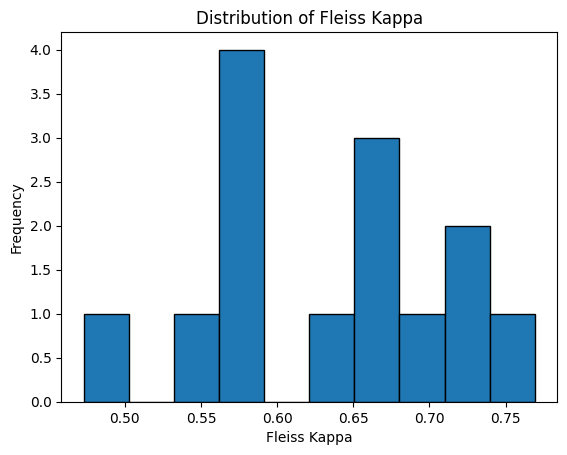

Mean of Fleiss Kappa: 0.6307116616828224
Standard Deviation of Fleiss Kappa: 0.08193621890874489


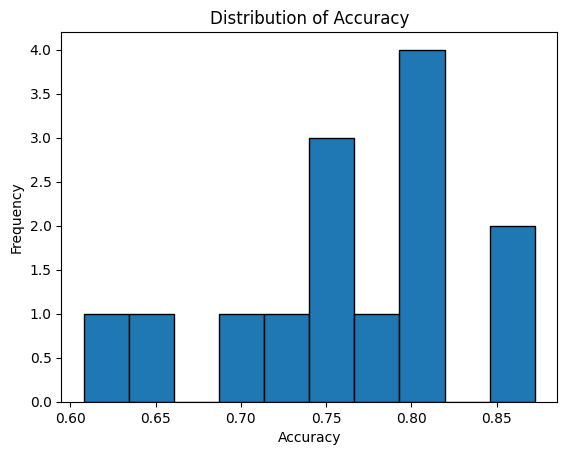

Mean of Accuracy: 0.7639090920778238
Standard Deviation of Accuracy: 0.07498624090366876


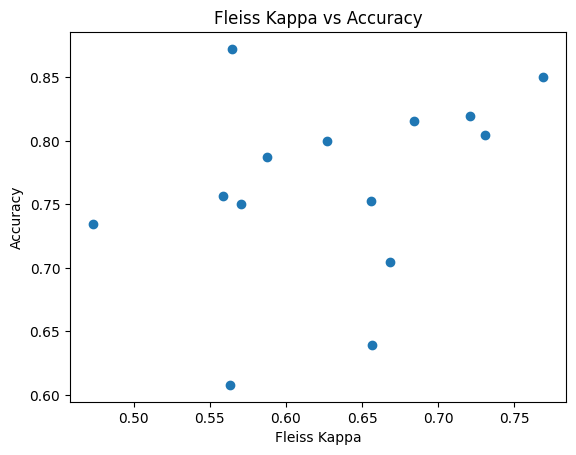

Correlation between Fleiss Kappa and Accuracy: 0.32911260086322386


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Descriptive Statistics
# Fleiss Kappa
plt.hist(merged_df['Fleiss Kappa'], bins=10, edgecolor='k')
plt.xlabel('Fleiss Kappa')
plt.ylabel('Frequency')
plt.title('Distribution of Fleiss Kappa')
plt.show()

fleiss_kappa_mean = merged_df['Fleiss Kappa'].mean()
fleiss_kappa_std = merged_df['Fleiss Kappa'].std()
print(f"Mean of Fleiss Kappa: {fleiss_kappa_mean}")
print(f"Standard Deviation of Fleiss Kappa: {fleiss_kappa_std}")

# Accuracy
plt.hist(merged_df['Accuracy'], bins=10, edgecolor='k')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy')
plt.show()

accuracy_mean = merged_df['Accuracy'].mean()
accuracy_std = merged_df['Accuracy'].std()
print(f"Mean of Accuracy: {accuracy_mean}")
print(f"Standard Deviation of Accuracy: {accuracy_std}")

# Step 2: Exploring Relationships Between Variables
plt.scatter(merged_df['Fleiss Kappa'], merged_df['Accuracy'])
plt.xlabel('Fleiss Kappa')
plt.ylabel('Accuracy')
plt.title('Fleiss Kappa vs Accuracy')
plt.show()

# Step 3: Interpretation and Preliminary Insights
correlation = merged_df['Fleiss Kappa'].corr(merged_df['Accuracy'])
print(f"Correlation between Fleiss Kappa and Accuracy: {correlation}")



# **ASSUMPTIONS CHECK**

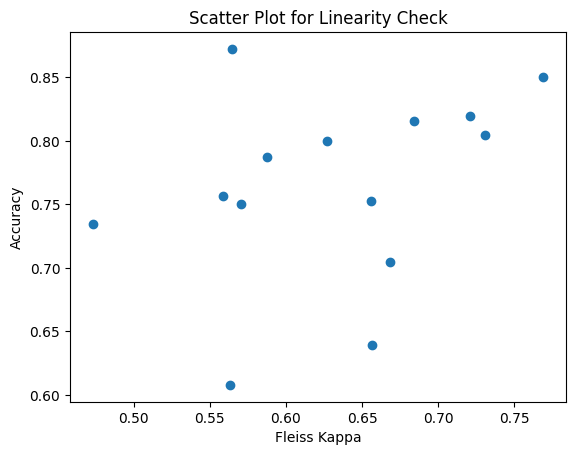

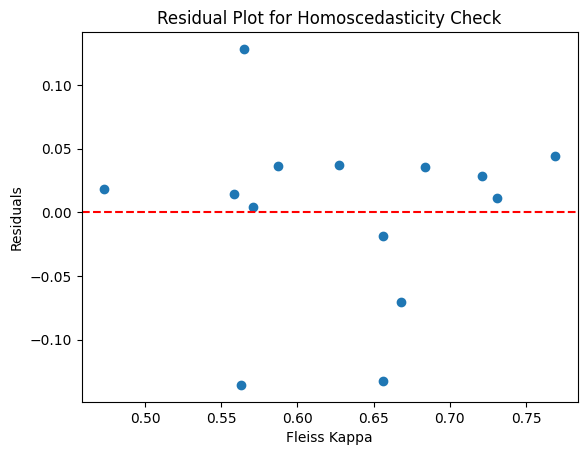

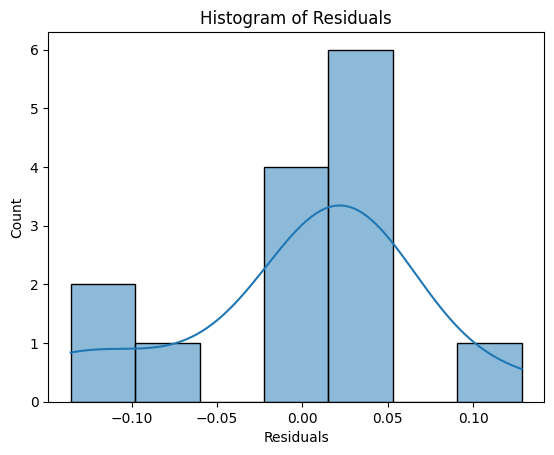

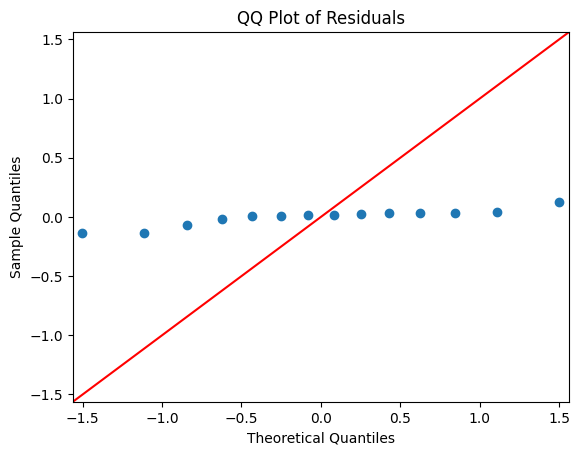

Durbin-Watson statistic: 1.5304494543048834


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson


# Step 1: Scatter Plot for Linearity
plt.scatter(merged_df['Fleiss Kappa'], merged_df['Accuracy'])
plt.xlabel('Fleiss Kappa')
plt.ylabel('Accuracy')
plt.title('Scatter Plot for Linearity Check')
plt.show()

# Fit the model
X = merged_df['Fleiss Kappa']
y = merged_df['Accuracy']
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

# Step 2: Residual Plot for Homoscedasticity
residuals = model.resid
plt.scatter(merged_df['Fleiss Kappa'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fleiss Kappa')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity Check')
plt.show()

# Step 3: Histogram and QQ Plot for Normality of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# Step 4: Durbin-Watson Test for Independence of Errors
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')


# **Simple Linear Regression Model**

Applying the Simple Linear Regression Model

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm

def calculate_simple_linear_regression(dataframe):
    # Extracting independent variable (X) and dependent variable (y)
    X = dataframe['Fleiss Kappa']
    y = dataframe['Accuracy']

    # Adding a constant to the independent variable
    X = sm.add_constant(X)

    # Fitting the linear regression model
    model = sm.OLS(y, X).fit()

    # Printing the summary of the regression model
    print(model.summary())

    # Return the fitted model
    return model

calculate_simple_linear_regression(merged_df)

                            OLS Regression Results                            
Dep. Variable:               Accuracy   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.458
Date:                Fri, 07 Jun 2024   Prob (F-statistic):              0.251
Time:                        17:03:28   Log-Likelihood:                 17.722
No. Observations:                  14   AIC:                            -31.44
Df Residuals:                      12   BIC:                            -30.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5739      0.159      3.619   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
import pandas as pd
import re

def tokenize_text(text):
    # Use regular expression to split text into tokens based on whitespace and punctuation
    tokens = re.findall(r'\w+|[^\w\s]', text, re.UNICODE)
    # Convert tokens to lowercase
    tokens = [token.lower().strip() for token in tokens if token.isalnum()]
    return tokens

def tokenize_escola_file(filename):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Tokenize each sentence in the "Sentence" column
    df['Tokenized Sentence'] = df['Sentence'].apply(tokenize_text)

    # Return the DataFrame with the tokenized sentences
    return df[["ID","COLA-ES",'Tokenized Sentence']]

filename = 'test_pred.csv'
tokenized_data = tokenize_escola_file(filename)
print(tokenized_data.head())

             ID  COLA-ES                                 Tokenized Sentence
0  ESCoLA_10146        7                                  [qué, te, parece]
1   ESCoLA_2419       13    [juan, es, el, chico, más, libros, que, compró]
2   ESCoLA_4535        7  [escribió, la, carta, juan, o, la, tarjeta, pe...
3   ESCoLA_7107       12  [los, mecánicos, arreglaron, la, puerta, y, la...
4   ESCoLA_3032       14  [maría, quería, un, coche, y, se, le, hemos, r...


In [ ]:
import pandas as pd

def calculate_norm_frequencies(tokenized_data_path, try_csv_path):

    # Load try.csv
    try_data = pd.read_csv(try_csv_path)

    try_data[' Item'] = try_data[' Item'].str.strip().str.lower()

    # Create a dictionary mapping words to relative frequencies
    word_to_norm_freq = dict(zip(try_data[' Item'], try_data['Frec_Rel']))

    # Function to calculate normalized frequencies for a given tokenized sentence
    def calculate_norm_freq(sentence):
        return [word_to_norm_freq.get(token, 0.0) for token in sentence]

    # Apply the function to each tokenized sentence and create a new column with the results
    tokenized_data['Normalized Frequencies'] = tokenized_data['Tokenized Sentence'].apply(calculate_norm_freq)

    return tokenized_data

result = calculate_norm_frequencies("tokenized_data", "try.csv")
print(result)

                ID  COLA-ES  \
0     ESCoLA_10146        7   
1      ESCoLA_2419       13   
2      ESCoLA_4535        7   
3      ESCoLA_7107       12   
4      ESCoLA_3032       14   
...            ...      ...   
1055  ESCoLA_10334        7   
1056   ESCoLA_3673        4   
1057   ESCoLA_4060        3   
1058   ESCoLA_1919       13   
1059    ESCoLA_512       11   

                                     Tokenized Sentence  \
0                                     [qué, te, parece]   
1       [juan, es, el, chico, más, libros, que, compró]   
2     [escribió, la, carta, juan, o, la, tarjeta, pe...   
3     [los, mecánicos, arreglaron, la, puerta, y, la...   
4     [maría, quería, un, coche, y, se, le, hemos, r...   
...                                                 ...   
1055         [fue, con, aquel, lápiz, con, que, dibujó]   
1056  [un, futbolista, agredió, a, una, periodista, ...   
1057  [durante, los, primeros, años, se, encargó, de...   
1058                        [juan, es

In [ ]:
import pandas as pd

# Function to calculate average normalized frequency
def calculate_average(row):
    return sum(row) / len(row)

# Apply the function to each list in the 'Normalized Frequencies' column
result['Average Normalized Frequency'] = result['Normalized Frequencies'].apply(calculate_average)

print(result)

                ID  COLA-ES  \
0     ESCoLA_10146        7   
1      ESCoLA_2419       13   
2      ESCoLA_4535        7   
3      ESCoLA_7107       12   
4      ESCoLA_3032       14   
...            ...      ...   
1055  ESCoLA_10334        7   
1056   ESCoLA_3673        4   
1057   ESCoLA_4060        3   
1058   ESCoLA_1919       13   
1059    ESCoLA_512       11   

                                     Tokenized Sentence  \
0                                     [qué, te, parece]   
1       [juan, es, el, chico, más, libros, que, compró]   
2     [escribió, la, carta, juan, o, la, tarjeta, pe...   
3     [los, mecánicos, arreglaron, la, puerta, y, la...   
4     [maría, quería, un, coche, y, se, le, hemos, r...   
...                                                 ...   
1055         [fue, con, aquel, lápiz, con, que, dibujó]   
1056  [un, futbolista, agredió, a, una, periodista, ...   
1057  [durante, los, primeros, años, se, encargó, de...   
1058                        [juan, es

Dividing the dataframes by category

In [ ]:
import pandas as pd

# Assuming organized_data_df is your DataFrame

# Group the DataFrame by the "Category" column
grouped_data = result.groupby("COLA-ES")

# Iterate over each group and save it to a CSV file
for category, data in grouped_data:
    # Create a filename based on the category
    filename = f"{category}_data.csv"
    # Save the data to a CSV file
    data.to_csv(filename, index=False)

Comparison

In [ ]:
import pandas as pd

def compare_average_normalized_frequency(file1):
    # Load the dataframes
    df1 = pd.read_csv(file1)

    # Calculate the average of the "Average Normalized Frequency" column for each dataframe
    avg_freq_df1 = df1['Average Normalized Frequency'].mean()

    # Print the averages
    print(f"Average Normalized Frequency Mean for {file1}: {avg_freq_df1}")

    median_freq_df1 = df1['Average Normalized Frequency'].median()

    print(f"Average Normalized Frequency Median for {file1}: {median_freq_df1}")

    return avg_freq_df1

file1 = '14_data.csv'
compare_average_normalized_frequency(file1)

Average Normalized Frequency Mean for 14_data.csv: 8682.275205645443
Average Normalized Frequency Median for 14_data.csv: 7956.098999999999


8682.275205645443

In [ ]:
import pandas as pd


data = {
    "Category": list(range(1, 15)),
    "Mean": [
        3805.705399999999, 6139.891880384198, 7800.094683156433, 7712.147261166611,
        8468.241338317577, 7260.965509475817, 8452.101424948527, 8670.613243081152,
        6776.592088865286, 8250.11332057509, 10176.568103642225, 7203.685932738143,
        7250.196577739842, 8682.275205645443
    ],
    "Median": [
        2475.5, 4039.09875, 7790.83857142857, 7063.511,
        7772.702857142857, 7198.277142857143, 8154.591, 8158.375666666667,
        6116.546, 7663.5866964285715, 9979.896666666667, 6800.428333333334,
        6762.596666666665, 7956.098999999999
    ]
}

# Creating DataFrame
df = pd.DataFrame(data)

print(df)

    Category          Mean       Median
0          1   3805.705400  2475.500000
1          2   6139.891880  4039.098750
2          3   7800.094683  7790.838571
3          4   7712.147261  7063.511000
4          5   8468.241338  7772.702857
5          6   7260.965509  7198.277143
6          7   8452.101425  8154.591000
7          8   8670.613243  8158.375667
8          9   6776.592089  6116.546000
9         10   8250.113321  7663.586696
10        11  10176.568104  9979.896667
11        12   7203.685933  6800.428333
12        13   7250.196578  6762.596667
13        14   8682.275206  7956.099000
